Problem 1

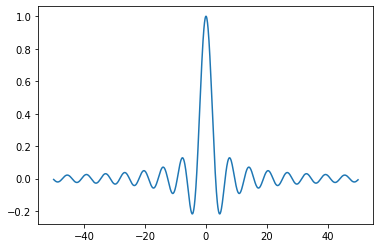

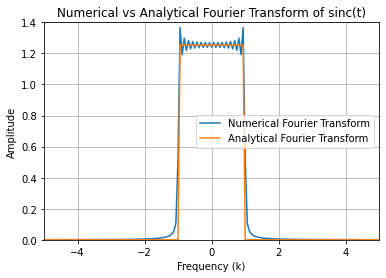

In [22]:
import numpy as np
import matplotlib.pyplot as plt


t_min = -50 
t_max = 50  
num_samples =1024  
delta_t = (t_max - t_min) / (num_samples-1)  
t = np.linspace(t_min, t_max, num_samples, endpoint=False)


f = np.zeros_like(t)
for i in range(len(t)):
    if t[i] == 0:
        f[i] = 1
    else:
        f[i] = np.sin(t[i]) / t[i]

plt.plot(t,f)
plt.show()


f_dft = np.fft.fft(f,norm='ortho')

k = (2*np.pi)*np.fft.fftfreq(num_samples, delta_t)  

F_continuous = delta_t * np.sqrt(num_samples / (2 * np.pi)) * np.exp(-1j * k * t_min) * f_dft
F_continuous =np.fft.fftshift(F_continuous)
k = np.fft.fftshift(k)


def box(f):
    return   np.where(np.abs(f) <= 1,np.pi*(1/np.sqrt(2*np.pi)), 0)

F_analytical = box(k)


plt.plot(k,  np.abs(F_continuous), label='Numerical Fourier Transform')
plt.plot(k, F_analytical, label='Analytical Fourier Transform')
plt.title('Numerical vs Analytical Fourier Transform of sinc(t)')
plt.xlabel('Frequency (k)')
plt.ylabel('Amplitude')
plt.xlim(-5, 5)  
plt.ylim(0,1.4) 
plt.legend()
plt.grid(True)
plt.show()